# Multiple linear regression 📈


## Introduction

* Multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables.

* In this Notebook, you will be analyzing a small business' historical marketing promotion data. Each row corresponds to an independent marketing promotion where their business uses TV, social media, radio, and influencer promotions to increase sales. They previously had you work on finding a single variable that predicts sales, and now they are hoping to expand this analysis to include other variables that can help them target their marketing efforts.

Will conduct a multiple linear regression analysis to estimate sales from a combination of independent variables. This will include:

* Exploring and cleaning data
* Using plots and descriptive statistics to select the independent variables
* Creating a fitting multiple linear regression model
* Checking model assumptions
* Interpreting model outputs and communicating the results to non-technical stakeholders

## Step 1: Imports 🚢

### Import packages

In [11]:
#data manipulation
import numpy as np
import pandas as pd

#statistic & regression
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

In [12]:
# TO IMPORT YOUR DATA.
data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows.
data.head(5)

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


## Step 2: Data exploration 🔎

### Familiarize yourself with the data's features

Start with an exploratory data analysis to familiarize yourself with the data and prepare it for modeling.

The features in the data are:

* TV promotional budget (in "Low," "Medium," and "High" categories)
* Social media promotional budget (in millions of dollars)
* Radio promotional budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in "Mega," "Macro," "Nano," and "Micro" categories)


**Question:** What are some purposes of EDA before constructing a multiple linear regression model?

Potential reasons include:

* Understanding which variables are present in the data
* Reviewing the distribution of features, such as minimum, mean, and maximum values
* Plotting the relationship between the independent and dependent variables to visualize which features have a linear relationship
* Identifying issues with the data, such as incorrect values (e.g., typos) or missing values

### Create a pairplot of the data

Create a pairplot to visualize the relationship between the continous variables in `data`.

In [13]:
# Create a pairplot
sns.pairplot(data, hue="TV")

**Question:** Which variables have a linear relationship with `Sales`? Why are some variables in the data excluded from the preceding plot?



`Radio` and `Social Media` both appear to have linear relationships with `Sales`. Given this, `Radio` and `Social Media` may be useful as independent variables in a multiple linear regression model estimating `Sales`. 

`TV` and `Influencer` are excluded from the pairplot because they are not numeric.

### Calculate the mean sales for each categorical variable

In [14]:
# Calculate the mean sales for each TV category. 
mean_Tv = data.groupby('TV').mean()['Sales']
print(mean_Tv)

# Calculate the mean sales for each Influencer category. 
mean_influncer = data.groupby('Influencer')['Sales'].mean()
mean_influncer

TV
High      300.529591
Low        91.646843
Medium    199.023461
Name: Sales, dtype: float64


Influencer
Macro    205.660047
Mega     180.385096
Micro    198.655080
Nano     190.777766
Name: Sales, dtype: float64

**Question:** What do you notice about the categorical variables? Could they be useful predictors of `Sales`?



The average `Sales` for `High` `TV` promotions is considerably higher than for `Medium` and `Low` `TV` promotions. `TV` may be a strong predictor of `Sales`.

The categories for `Influencer` have different average `Sales`, but the variation is not substantial. `Influencer` may be a weak predictor of `Sales`.

These results can be investigated further when fitting the multiple linear regression model.

### Remove missing data

This dataset contains rows with missing values. To correct this, drop all rows that contain missing data.

In [15]:
# Drop rows that contain missing data
data = data.dropna(axis=0)

### Clean column names

In [16]:
# Rename all columns in data 
data = data.rename(columns={'Social Media':'Social_Media'})
data.head()

,TV,Radio,Social_Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


## Step 3: Model building 🤖

### Fit a multiple linear regression model that predicts sales

In [17]:
# Define the OLS formula.
ols_formula = 'Sales ~ Radio + C(TV)'

# Create an OLS model.
OLS = ols(formula=ols_formula, data=data)

# Fit the model.
model = OLS.fit()

# Save the results summary.
model_result = model.summary()

# Display the model results. 
model_result

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Fri, 28 Jul 2023   Prob (F-statistic):          1.61e-287
Time:                        22:33:09   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.6367      6.577     33.089      0.000     204.718     230.556
C(TV)[T.Low]     -152.0897      5.160    -29.474      0.000    -162.225    -141.954
C(TV)[T.Medium]   -73.4835      3.587    -20.484      0.000     -80.530     -66.437
Radio               2.8864      0.217     13.306      0.000       2.460       3.312
==============================================================================
Omnibus:                       35.219   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.863
Skew:                           0.087   Prob(JB):                     0.000976
Kurtosis:                       2.255   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** Which independent variables did you choose for the model, and why?



* The `TV` column has a category variable and whether it related to the sales
* The `Radio` has a linear relationship compared to others

### Check model assumptions

Check that all five multiple linear regression assumptions are upheld for your model.

### Model assumption: Linearity

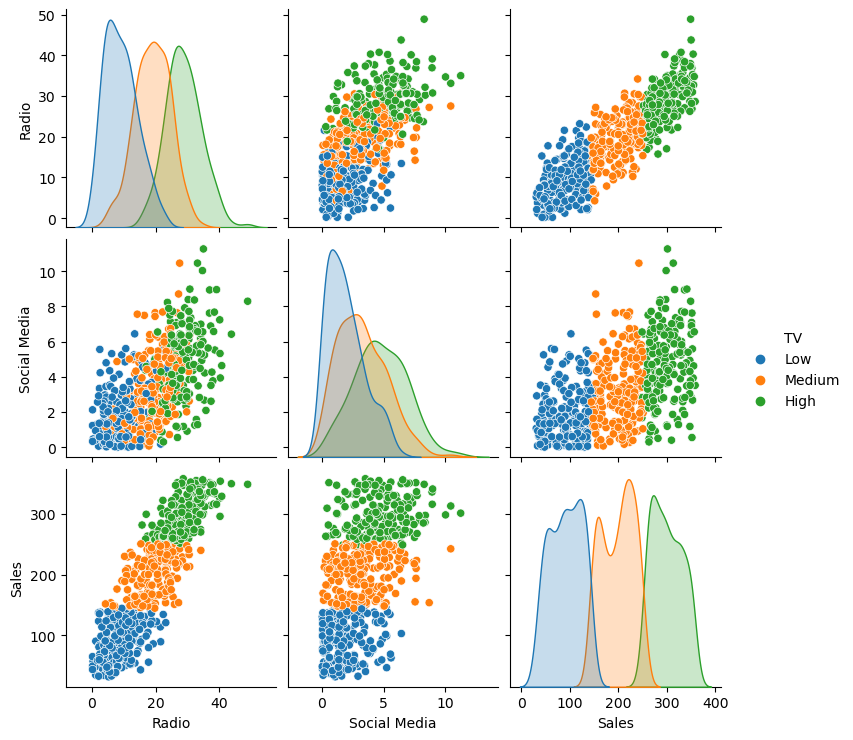

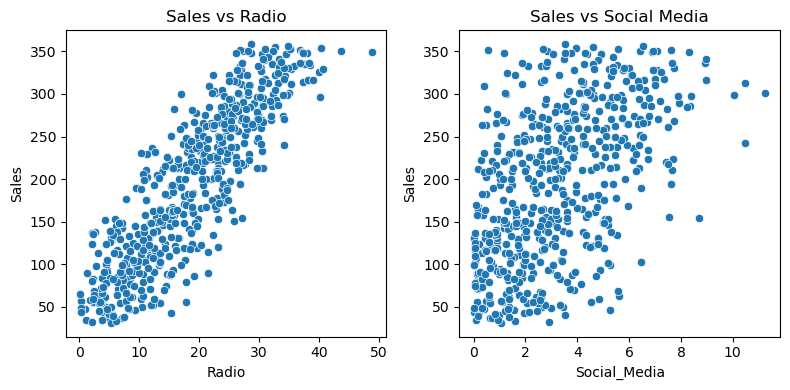

In [18]:
# Create a scatterplot for each independent variable and the dependent variable.
fig, axes = plt.subplots(1, 2, figsize=(8,4))

#scatter plot of sales vs radio
sns.scatterplot(x=data['Radio'], y=data['Sales'], ax=axes[0])

#define title
axes[0].set_title('Sales vs Radio')

#scatter plot of sales vs tv
sns.scatterplot(x=data['Social_Media'],y=data['Sales'], ax=axes[1])

#title of chart
axes[1].set_title('Sales vs Social Media')

#space between two chart
plt.tight_layout()

#dispaly the graph
plt.show()

### Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### Model assumption: Normality

Create the following plots to check the **normality assumption**:

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

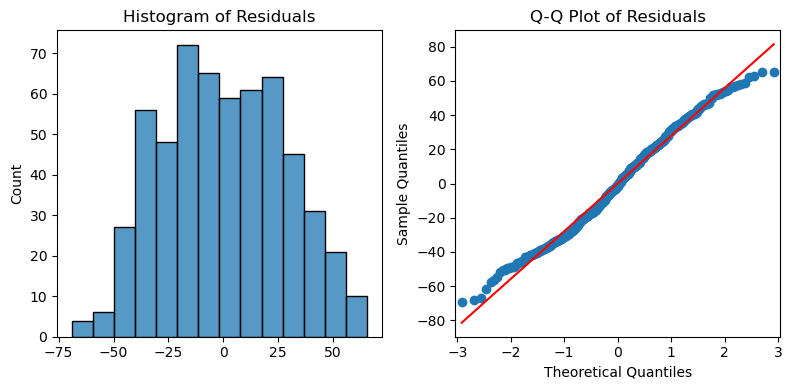

In [19]:
# Calculate the residuals.
residuals = model.resid

# Create a histogram with the residuals. 
fig, axes = plt.subplots(1, 2, figsize=(8,4))
sns.histplot(data=residuals, ax=axes[0])
axes[0].set_title('Histogram of Residuals')

# Create a Q-Q plot of the residuals.
sm.qqplot(residuals, line='s', ax=axes[1])
axes[1].set_title('Q-Q Plot of Residuals')

#add a space between a graph and display
plt.tight_layout()
plt.show()


### Model assumption: Constant variance

Check that the **constant variance assumption** is not violated by creating a scatterplot with the fitted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

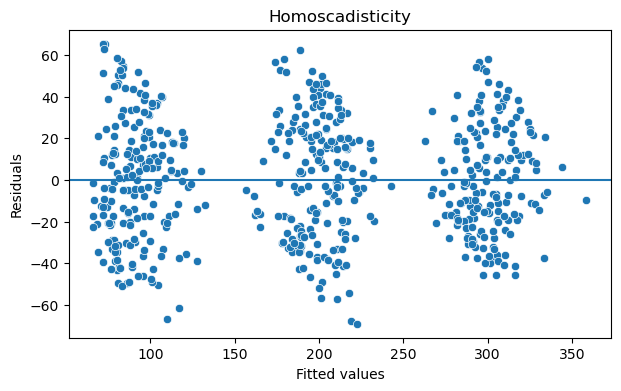

In [20]:
# Create a scatterplot with the fitted values from the model and the residuals.
plt.figure(figsize=(7,4))
fig = sns.scatterplot(x=model.fittedvalues, y=residuals)
fig.set_xlabel('Fitted values')
fig.set_ylabel('Residuals')
fig.set_title('Homoscadisticity')
fig.axhline(0)
plt.show()

### Model assumption: No multicollinearity

The **no multicollinearity assumption** states that no two independent variables ($X_i$ and $X_j$) can be highly correlated with each other. 

Two common ways to check for multicollinearity are to:

* Create scatterplots to show the relationship between pairs of independent variables
* Use the variance inflation factor to detect multicollinearity

In [21]:
# Create a pairplot of the data.
sns.pairplot(data)

In [23]:
# Calculate the variance inflation factor (another way)
X= data[['Radio', 'Social_Media']]

#outlier detection
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#creating new data frame with vif value and display
df_vif = pd.DataFrame(vif, index=X.columns, columns=['VIF'])
df_vif

,VIF
Radio,4.93238
Social_Media,4.93238


## Step 4: Results and evaluation 

### Display the OLS regression results

If the model assumptions are met, you can interpret the model results accurately.

First, display the OLS regression results.

In [ ]:
# Display the model results summary.
model_result

**Question:** What is your interpretation of the model's R-squared?


Using `TV` and `Radio` as the independent variables results in a multiple linear regression model with $R^{2} = 0.904$. In other words, the model explains $90.4\%$ of the variation in `Sales`. This makes the model an excellent predictor of `Sales`.

### Interpret model coefficients

With the model fit evaluated, you can look at the coefficient estimates and the uncertainty of these estimates.

In [ ]:
# Display the model results summary.
model_result

**Question:** What are the model coefficients?



When `TV` and `Radio` are used to predict `Sales`, the model coefficients are:

* $\beta_{0} =  218.5261$
* $\beta_{TVLow}= -154.2971$
* $\beta_{TVMedium} = -75.3120$
* $\beta_{Radio} =  2.9669$

**Question:** How would you write the relationship between `Sales` and the independent variables as a linear equation?



$\text{Sales} = \beta_{0} + \beta_{1}*X_{1}+ \beta_{2}*X_{2}+ \beta_{3}*X_{3}$

$\text{Sales} = \beta_{0} + \beta_{TVLow}*X_{TVLow}+ \beta_{TVMedium}*X_{TVMedium}+ \beta_{Radio}*X_{Radio}$

$\text{Sales} = 218.5261 - 154.2971*X_{TVLow} - 75.3120*X_{TVMedium}+ 2.9669 *X_{Radio}$

**Question:** What is your intepretation of the coefficient estimates? Are the coefficients statistically significant?



The default `TV` category for the model is `High` since there are coefficients for the other two `TV` categories, `Medium` and `Low`. Because the coefficients for the `Medium` and `Low` `TV` categories are negative, that means the average of sales is lower for `Medium` or `Low` `TV` categories compared to the `High` `TV` category when `Radio` is at the same level.

For example, the model predicts that a `Low` `TV` promotion is 154.2971 lower on average compared to a `high` `TV` promotion given the same `Radio` promotion.

The coefficient for `Radio` is positive, confirming the positive linear relationship shown earlier during the exploratory data analysis.

The p-value for all coefficients is $0.000$, meaning all coefficients are statistically significant at $p=0.05$. The 95% confidence intervals for each coefficient should be reported when presenting results to stakeholders. 

For example, there is a $95\%$ chance that the interval $[-163.979,-144.616]$ contains the true parameter of the slope of $\beta_{TVLow}$, which is the estimated difference in promotion sales when a `Low` `TV` promotion is chosen instead of a `High` `TV` promotion.

**Question:** Why is it important to interpret the beta coefficients?



Beta coefficients allow you to estimate the magnitude and direction (positive or negative) of the effect of each independent variable on the dependent variable. The coefficient estimates can be converted to explainable insights, such as the connection between an increase in TV promotional budgets and sales mentioned previously.

**Question:** Do you think your model could be improved? Why or why not? How?

Given how accurate `TV` was as a predictor, the model could be improved by getting a more granular view of the `TV` promotions, such as by considering more categories or the actual `TV` promotional budgets.

Furthermore, additional variables, such as the location of the marketing campaign or the time of year, could increase model accuracy. 

#### **References**

Saragih, H.S. (2020). [*Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data).